In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline

In [ ]:
#Q1 Perform correlation analysis on PM2.5 data obtained from the provinces of Kanchanaburi, Rayong and Narathiwat. Display the correlation matrix using plasma colormap.

In [2]:
Nara =pd.read_csv('narathiwat.csv')
Kan =pd.read_csv('kanchanaburi_pm25.csv')
Rayong = pd.read_csv('rayongmaptaphut_pm25.csv')

In [3]:
Nara.head(5)

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0


In [4]:
Kan.head(5)

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,65.2,1,0
1,2016,3,3,9,65.2,1,0
2,2016,3,3,10,64.9,1,0
3,2016,3,3,11,64.9,1,0
4,2016,3,3,12,38.4,1,0


In [5]:
Rayong.head(5)

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,40.6,1,0
1,2016,3,3,9,40.6,1,0
2,2016,3,3,10,40.6,1,0
3,2016,3,3,11,40.6,1,0
4,2016,3,3,12,38.7,1,0


In [6]:
Nara1 = Nara[['PM2.5']]
Nara1

,PM2.5
0,62.9
1,62.9
2,55.5
3,55.5
4,47.9
...,...
23810,15.0
23811,12.0
23812,12.0
23813,20.0


In [7]:
Kan2 = Kan[['PM2.5']]
Kan2

,PM2.5
0,65.2
1,65.2
2,64.9
3,64.9
4,38.4
...,...
23803,35.0
23804,35.0
23805,42.0
23806,47.0


In [8]:
Rayong3 =Rayong[['PM2.5']]
Rayong3

,PM2.5
0,40.6
1,40.6
2,40.6
3,40.6
4,38.7
...,...
23807,18.0
23808,27.0
23809,20.0
23810,29.0


In [9]:
Nara1.rename(columns= {'PM2.5' : 'Nara2.5'}, inplace = True)
Nara1

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Nara2.5
0,62.9
1,62.9
2,55.5
3,55.5
4,47.9
...,...
23810,15.0
23811,12.0
23812,12.0
23813,20.0


In [10]:
Kan2.rename(columns= {'PM2.5' : 'Kan2.5'}, inplace = True)
Kan2

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Kan2.5
0,65.2
1,65.2
2,64.9
3,64.9
4,38.4
...,...
23803,35.0
23804,35.0
23805,42.0
23806,47.0


In [11]:
Rayong3.rename(columns= {'PM2.5' : 'Rayong2.5'}, inplace = True)
Rayong3

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Rayong2.5
0,40.6
1,40.6
2,40.6
3,40.6
4,38.7
...,...
23807,18.0
23808,27.0
23809,20.0
23810,29.0


In [12]:
frames1 = pd.concat([Nara1,Kan2,Rayong3], axis=1 ,join = 'outer')
frames1

,Nara2.5,Kan2.5,Rayong2.5
0,62.9,65.2,40.6
1,62.9,65.2,40.6
2,55.5,64.9,40.6
3,55.5,64.9,40.6
4,47.9,38.4,38.7
...,...,...,...
23810,15.0,NaN,29.0
23811,12.0,NaN,22.0
23812,12.0,NaN,NaN
23813,20.0,NaN,NaN


In [13]:
frames1.corr()

,Nara2.5,Kan2.5,Rayong2.5
Nara2.5,1.000000,0.631500,0.545193
Kan2.5,0.631500,1.000000,0.665913
Rayong2.5,0.545193,0.665913,1.000000


<AxesSubplot:>

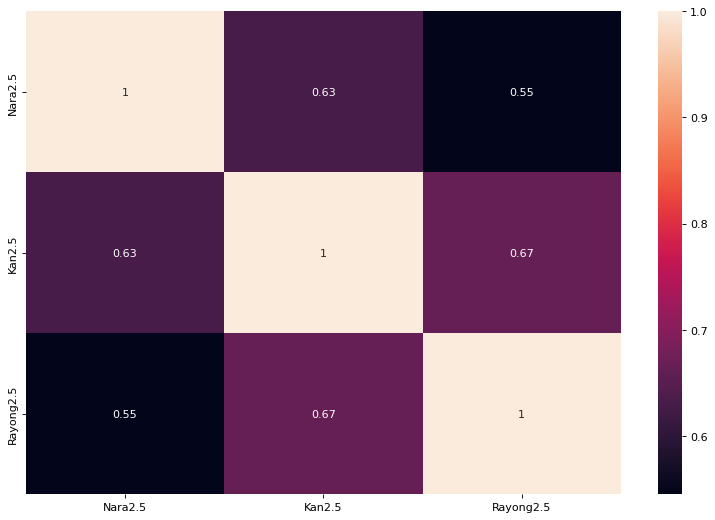

In [14]:
#1
plt.figure(figsize=(12, 8), dpi=80)
sns.heatmap(frames1.corr(), annot = True)

In [ ]:
#Q2 Perform year-wise trend of line plot for all the data

In [19]:
#2
Year = Nara[['Year']]

In [21]:
frames2 = pd.concat([Year,frames1], axis=1)
frames2

,Year,Nara2.5,Kan2.5,Rayong2.5
0,2016,62.9,65.2,40.6
1,2016,62.9,65.2,40.6
2,2016,55.5,64.9,40.6
3,2016,55.5,64.9,40.6
4,2016,47.9,38.4,38.7
...,...,...,...,...
23810,2019,15.0,NaN,29.0
23811,2019,12.0,NaN,22.0
23812,2019,12.0,NaN,NaN
23813,2019,20.0,NaN,NaN


In [23]:
pivot_cols = ['Year','Nara2.5','Kan2.5','Rayong2.5']
pivot_df = frames2[pivot_cols]
pivot_df.head()

,Year,Nara2.5,Kan2.5,Rayong2.5
0,2016,62.9,65.2,40.6
1,2016,62.9,65.2,40.6
2,2016,55.5,64.9,40.6
3,2016,55.5,64.9,40.6
4,2016,47.9,38.4,38.7


In [24]:
pivot_df.describe()

,Year,Nara2.5,Kan2.5,Rayong2.5
count,23815.000000,23815.000000,23808.000000,23812.000000
mean,2017.126517,24.595347,24.297442,20.072153
std,0.875125,13.573874,16.734309,12.836449
min,2016.000000,0.000000,0.000000,0.000000
25%,2016.000000,14.900000,12.100000,11.100000
50%,2017.000000,21.000000,19.400000,16.900000
75%,2018.000000,30.900000,31.800000,25.700000
max,2019.000000,115.400000,138.900000,116.600000


In [25]:
pivot_df.isnull().sum()

Year         0
Nara2.5      0
Kan2.5       7
Rayong2.5    3
dtype: int64

In [26]:
pivot_df.shape

(23815, 4)

In [27]:
pivot_df.dropna().shape

(23808, 4)

In [29]:
x = pivot_df.index
y1 = pivot_df['Nara2.5']
y2 = pivot_df['Kan2.5']
y3 = pivot_df['Rayong2.5']

Text(0.5, 1.0, 'Rayong2.5')

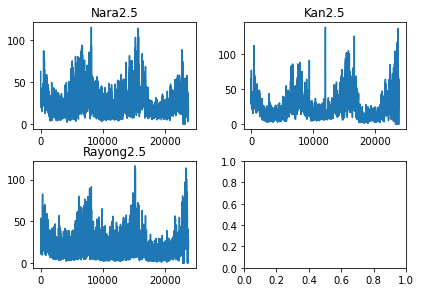

In [30]:
fig,axs = plt.subplots(2,2)
fig.tight_layout()

axs[0,0].plot(x,y1)
axs[0,0].set_title('Nara2.5')

axs[0,1].plot(x,y2)
axs[0,1].set_title('Kan2.5')

axs[1,0].plot(x,y3)
axs[1,0].set_title('Rayong2.5')

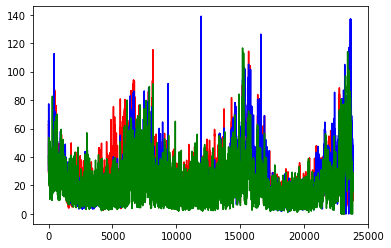

In [33]:
plt.plot(x,
         y1,'r-',
         y2,'b-',
         y3,'g-')

In [41]:
Nara

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0
...,...,...,...,...,...,...,...
23810,2019,2,7,5,15.0,21,0
23811,2019,2,7,6,12.0,24,0
23812,2019,2,7,7,12.0,26,0
23813,2019,2,7,8,20.0,29,0


In [42]:
Nara.rename(columns={'UTC Hour':'Hour'}, inplace=True)
Nara.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0


In [43]:
Nara['datetime'] = pd.to_datetime(Nara[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7) 
Nara.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
0,2016,3,3,8,62.9,1,0,2016-03-03 15:00:00
1,2016,3,3,9,62.9,1,0,2016-03-03 16:00:00
2,2016,3,3,10,55.5,1,0,2016-03-03 17:00:00
3,2016,3,3,11,55.5,1,0,2016-03-03 18:00:00
4,2016,3,3,12,47.9,1,0,2016-03-03 19:00:00


In [46]:
Nara.index = Nara['datetime']
Nara.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-03-03 15:00:00,2016,3,3,8,62.9,1,0,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,9,62.9,1,0,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,10,55.5,1,0,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,11,55.5,1,0,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,12,47.9,1,0,2016-03-03 19:00:00


In [47]:
Nara.Hour = Nara.index.hour 
Nara.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9,1,0,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,16,62.9,1,0,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,17,55.5,1,0,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,18,55.5,1,0,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,19,47.9,1,0,2016-03-03 19:00:00


In [48]:
Nara.drop(columns=['PM10_mask','Retrospective','datetime'],inplace=True)
Nara.head()

,Year,Month,Day,Hour,PM2.5
datetime,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9
2016-03-03 16:00:00,2016,3,3,16,62.9
2016-03-03 17:00:00,2016,3,3,17,55.5
2016-03-03 18:00:00,2016,3,3,18,55.5
2016-03-03 19:00:00,2016,3,3,19,47.9


In [52]:
pv = pd.pivot_table(Nara, index=Nara.index.dayofyear, columns=Nara.index.year,values='PM2.5', aggfunc='mean')
pv

datetime,2016,2017,2018,2019
datetime,,,,
1,NaN,22.187500,21.995652,21.691667
2,NaN,20.433333,26.062500,18.041667
3,NaN,20.837500,32.045833,13.708333
4,NaN,25.137500,35.591667,5.500000
5,NaN,26.462500,41.770833,13.166667
...,...,...,...,...
362,27.770833,21.618182,NaN,NaN
363,33.321739,18.612500,NaN,NaN
364,32.800000,18.825000,NaN,NaN


<AxesSubplot:title={'center':'NarathiwatPM2.5 Daily Average Yearly comparison (ug/m3)'}, xlabel='datetime'>

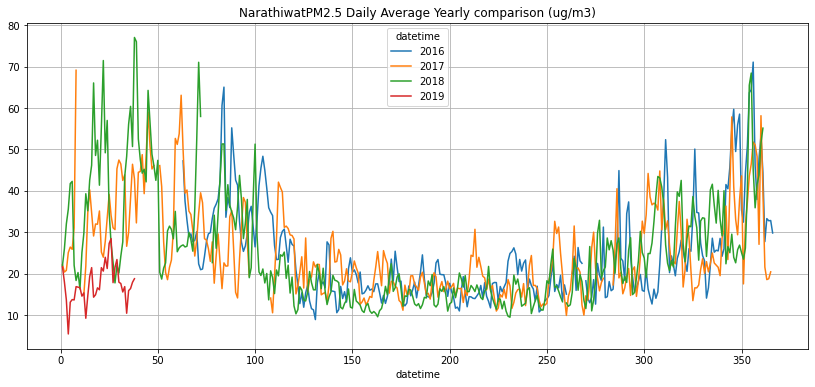

In [53]:
pv.plot(title="NarathiwatPM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

In [54]:
Kan

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,65.2,1,0
1,2016,3,3,9,65.2,1,0
2,2016,3,3,10,64.9,1,0
3,2016,3,3,11,64.9,1,0
4,2016,3,3,12,38.4,1,0
...,...,...,...,...,...,...,...
23803,2019,2,7,5,35.0,45,0
23804,2019,2,7,6,35.0,45,0
23805,2019,2,7,7,42.0,56,0
23806,2019,2,7,8,47.0,64,0


In [55]:
Kan.rename(columns={'UTC Hour':'Hour'}, inplace=True)
Kan.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,65.2,1,0
1,2016,3,3,9,65.2,1,0
2,2016,3,3,10,64.9,1,0
3,2016,3,3,11,64.9,1,0
4,2016,3,3,12,38.4,1,0


In [58]:
Kan['datetime'] = pd.to_datetime(Kan[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7) 
Kan.index = Kan['datetime']
Kan.Hour = Kan.index.hour  
Kan.drop(columns=['PM10_mask','Retrospective','datetime'],inplace=True)
Kan.head()

,Year,Month,Day,Hour,PM2.5
datetime,,,,,
2016-03-03 22:00:00,2016,3,3,22,65.2
2016-03-03 23:00:00,2016,3,3,23,65.2
2016-03-04 00:00:00,2016,3,3,0,64.9
2016-03-04 01:00:00,2016,3,3,1,64.9
2016-03-04 02:00:00,2016,3,3,2,38.4


In [59]:
pv1 = pd.pivot_table(Kan, index=Kan.index.dayofyear, columns=Kan.index.year,values='PM2.5', aggfunc='mean')
pv1

datetime,2016,2017,2018,2019
datetime,,,,
1,NaN,22.112500,25.350000,26.391667
2,NaN,21.279167,29.804167,34.166667
3,NaN,22.295833,36.400000,34.291667
4,NaN,26.879167,42.404167,43.375000
5,NaN,28.808333,46.641667,43.666667
...,...,...,...,...
362,25.829167,11.295652,38.040000,NaN
363,26.143478,18.108333,NaN,NaN
364,35.912500,17.995833,22.800000,NaN


<AxesSubplot:title={'center':'KanchanaburiPM2.5 Daily Average Yearly comparison (ug/m3)'}, xlabel='datetime'>

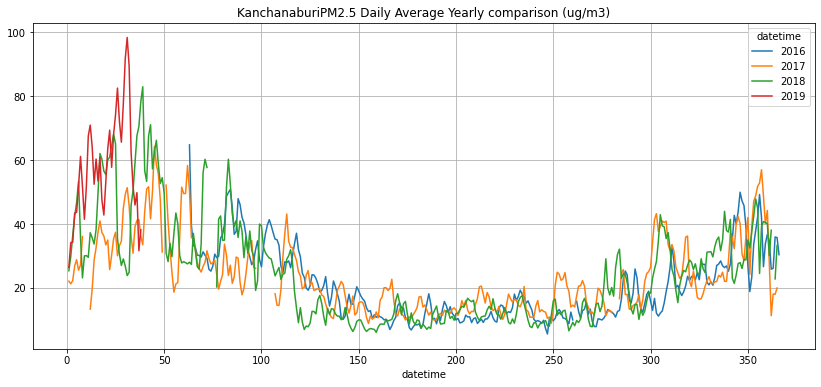

In [61]:
pv1.plot(title="KanchanaburiPM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

In [63]:
Rayong

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,40.6,1,0
1,2016,3,3,9,40.6,1,0
2,2016,3,3,10,40.6,1,0
3,2016,3,3,11,40.6,1,0
4,2016,3,3,12,38.7,1,0
...,...,...,...,...,...,...,...
23807,2019,2,7,5,18.0,40,0
23808,2019,2,7,6,27.0,42,0
23809,2019,2,7,7,20.0,37,0
23810,2019,2,7,8,29.0,34,0


In [64]:
Rayong.rename(columns={'UTC Hour':'Hour'}, inplace=True)
Rayong.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,40.6,1,0
1,2016,3,3,9,40.6,1,0
2,2016,3,3,10,40.6,1,0
3,2016,3,3,11,40.6,1,0
4,2016,3,3,12,38.7,1,0


In [65]:
Rayong['datetime'] = pd.to_datetime(Rayong[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7) 
Rayong.index = Rayong['datetime']
Rayong.Hour = Rayong.index.hour  
Rayong.drop(columns=['PM10_mask','Retrospective','datetime'],inplace=True)
Rayong.head()

,Year,Month,Day,Hour,PM2.5
datetime,,,,,
2016-03-03 15:00:00,2016,3,3,15,40.6
2016-03-03 16:00:00,2016,3,3,16,40.6
2016-03-03 17:00:00,2016,3,3,17,40.6
2016-03-03 18:00:00,2016,3,3,18,40.6
2016-03-03 19:00:00,2016,3,3,19,38.7


In [66]:
pv2 = pd.pivot_table(Rayong, index=Rayong.index.dayofyear, columns=Rayong.index.year,values='PM2.5', aggfunc='mean')
pv2

datetime,2016,2017,2018,2019
datetime,,,,
1,NaN,25.054167,17.834783,12.058333
2,NaN,22.166667,19.883333,18.583333
3,NaN,22.712500,29.370833,14.458333
4,NaN,23.345833,35.950000,27.500000
5,NaN,29.220833,48.679167,36.041667
...,...,...,...,...
362,29.245833,27.568182,NaN,NaN
363,21.208696,21.100000,NaN,NaN
364,27.425000,22.933333,NaN,NaN


<AxesSubplot:title={'center':'RayongiPM2.5 Daily Average Yearly comparison (ug/m3)'}, xlabel='datetime'>

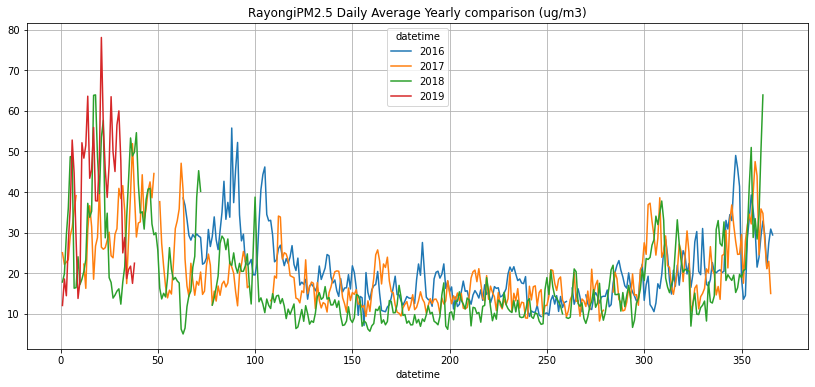

In [68]:
pv2.plot(title="RayongiPM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

In [ ]:
#Q3 Display a pie chart with explosion on any of the data with 0-50 as normal 50-100 moderate and 100+ for abnormal


In [76]:
#3
arr = []
for i in Nara['PM2.5']:
    if i<=50:
        arr.append('Normal')
    elif i<=100:
        arr.append('Moderate')
    else:
        arr.append('Abnormal')
Nara['size'] = arr
Nara.head()

,Year,Month,Day,Hour,PM2.5,size
datetime,,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9,Moderate
2016-03-03 16:00:00,2016,3,3,16,62.9,Moderate
2016-03-03 17:00:00,2016,3,3,17,55.5,Moderate
2016-03-03 18:00:00,2016,3,3,18,55.5,Moderate
2016-03-03 19:00:00,2016,3,3,19,47.9,Normal


In [79]:
pie_size = Nara.groupby(by=Nara['size']).sum()
pie_size

,Year,Month,Day,Hour,PM2.5
size,,,,,
Abnormal,10089,9,69,44,538.0
Moderate,2686854,8469,20707,13718,81796.2
Normal,45340925,149816,354047,260590,503404.0


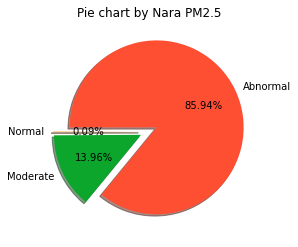

In [81]:
explode = (0.1, 0.1, 0.1)
label = ['Normal','Moderate','Abnormal']
color = ['#FFA233','#0CA62C','#FF4F33']
fig, ax = plt.subplots()
ax.pie(pie_size['PM2.5'],
       explode=explode,
       labels = label,
       colors = color,
       autopct='%1.2f%%',
       shadow=True,
       startangle=180)
ax.set_title('Pie chart by Nara PM2.5')
plt.show()

In [82]:
arr = []
for i in Kan['PM2.5']:
    if i<=50:
        arr.append('Normal')
    elif i<=100:
        arr.append('Moderate')
    else:
        arr.append('Abnormal')
Kan['size'] = arr
Kan.head()

,Year,Month,Day,Hour,PM2.5,size
datetime,,,,,,
2016-03-03 22:00:00,2016,3,3,22,65.2,Moderate
2016-03-03 23:00:00,2016,3,3,23,65.2,Moderate
2016-03-04 00:00:00,2016,3,3,0,64.9,Moderate
2016-03-04 01:00:00,2016,3,3,1,64.9,Moderate
2016-03-04 02:00:00,2016,3,3,2,38.4,Normal


In [87]:
pie_size1 = Kan.groupby(by=Kan['size']).sum()
pie_size1

,Year,Month,Day,Hour,PM2.5
size,,,,,
Abnormal,155448,100,1882,1220,8542.6
Moderate,3624117,6678,27213,21398,115366.3
Normal,44244177,151468,345574,251219,454564.6


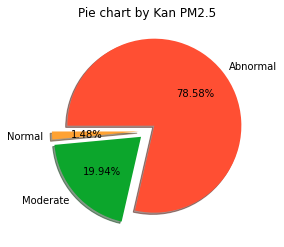

In [88]:
explode = (0.1, 0.1, 0.1)
label = ['Normal','Moderate','Abnormal']
color = ['#FFA233','#0CA62C','#FF4F33']
fig, ax = plt.subplots()
ax.pie(pie_size1['PM2.5'],
       explode=explode,
       labels = label,
       colors = color,
       autopct='%1.2f%%',
       shadow=True,
       startangle=180)
ax.set_title('Pie chart by Kan PM2.5')
plt.show()

In [85]:
arr = []
for i in Rayong['PM2.5']:
    if i<=50:
        arr.append('Normal')
    elif i<=100:
        arr.append('Moderate')
    else:
        arr.append('Abnormal')
Rayong['size'] = arr
Rayong.head()

,Year,Month,Day,Hour,PM2.5,size
datetime,,,,,,
2016-03-03 15:00:00,2016,3,3,15,40.6,Normal
2016-03-03 16:00:00,2016,3,3,16,40.6,Normal
2016-03-03 17:00:00,2016,3,3,17,40.6,Normal
2016-03-03 18:00:00,2016,3,3,18,40.6,Normal
2016-03-03 19:00:00,2016,3,3,19,38.7,Normal


In [89]:
pie_size2 = Rayong.groupby(by=Rayong['size']).sum()
pie_size2

,Year,Month,Day,Hour,PM2.5
size,,,,,
Abnormal,20184,10,204,148,1098.2
Moderate,1579907,2969,13150,7891,47485.9
Normal,46431727,155292,361405,266291,429374.0


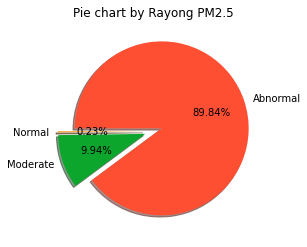

In [91]:
explode = (0.1, 0.1, 0.1)
label = ['Normal','Moderate','Abnormal']
color = ['#FFA233','#0CA62C','#FF4F33']
fig, ax = plt.subplots()
ax.pie(pie_size2['PM2.5'],
       explode=explode,
       labels = label,
       colors = color,
       autopct='%1.2f%%',
       shadow=True,
       startangle=180)
ax.set_title('Pie chart by Rayong PM2.5')
plt.show()